In [1]:
import serial, time, csv, math, pandas as pd, pyvisa, glob, matplotlib.pyplot as plt, os.path, numpy as np, pathlib, datetime;
from csv import reader
import sys
from scipy import interpolate

In [ ]:
#generates csv file of data for each bandpass filter

#find intersection point with horizontal 3dB line
def find_roots(x,y): 
    s = np.abs(np.diff(np.sign(y))).astype(bool)
    return x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1) 

homedir = "/Volumes/GoogleDrive/.shortcut-targets-by-id/1OcwVYdCFsNitauuq7YD82J3wd781RFEz/Zhao_Nicole /jupyter_homedir/BPF_results/test"
os.chdir(homedir)
#make a list of all folders
dirs = [d for d in os.listdir(homedir) if os.path.isdir(os.path.join(homedir, d))]

for d in dirs: 
    os.chdir(homedir + '/' + d) 
    
    #create list to store x & y values pulled from files
    xs = [] #bandpass freq
    ys = [] #vout/vin
    zs = [] #store Vin freq (Hz) values
    colors = ['g','y','c']
    output = [] #output value for text file

    #import and read file
    file_list = glob.glob(homedir + '/' + d + '/*.csv')
    file_list.sort() 
    
    for file in file_list:
        data = pd.read_csv(file)
        #print(data)
        xs.append(data["BP freq (Hz)"][0])
        ys.append(data["Vout dmm (V)"]/data["Vin (V)"])
        zs.append(data["Vin freq (Hz)"]) 
    
        fname = str("data_" + d + '.csv') 
        cwd = os.getcwd()
        new_dir= pathlib.Path(cwd)
        fpath = (new_dir / fname).with_suffix('.csv')
        with fpath.open(mode='w+') as csvfile:
            logfile = csv.writer(csvfile)    
            logfile.writerow(["SN", "Timestamp", "f0Nominal_Hz", "f0Meas_Hz", "BW_3dB", "Ratio"])
        
            #iterate over each center freq
            for ifc in range(len(xs)): 
                xmin = min(zs[ifc]) #establish min & max freq range on xaxis based on data set
                xmax = max(zs[ifc]) 

                #have values interpolated
                f = interpolate.interp1d(zs[ifc],ys[ifc],'cubic')
                x_interp = np.arange(xmin,xmax,0.01) #map to 1/100 hz 
                y_interp = f(x_interp) #map y against x

                #plot zero
                roots = find_roots(x_interp,10**(-3/20)-y_interp) #find roots at y=-3dB

                #find important values 
                #print ("np.max(y):"+ str(np.max(y_interp)))
                f0 = x_interp[np.argmax(y_interp)] #xmax; 1 decimal place 
                #print(f0)
                BW3dB = float(np.diff(roots)) #find 3dB bandwidth
                ratio = f0/BW3dB #ratio of f0/BW3dB
                #plt.text(400,0.004+0.02*ifc,"f_0=" + "{:.2f}".format(f0) + "Hz"  + "\nBW_3dB=" 
                       #+ "{:.2f}".format(BW3dB) + "Hz" + "\nRatio=" + "{:.2f}".format(ratio),fontsize=10, bbox = dict(facecolor = 'blue', alpha = 0.2,edgecolor='blue')) 
                #write to csv file 
                logfile.writerow([d[3:6],d[7:],xs[ifc],"{:.7f}".format(f0),"{:.7f}".format(BW3dB), 
                               "{:.7f}".format(ratio)])

[49.89298592 49.97026041 50.05493355 49.71112094 49.6061674  49.55099613
 49.9524283  50.21368268 50.04602147 50.63961663 50.03915584 49.63697312
 49.50047027 50.1439355  50.29698444 51.01280279 50.77835726 50.12566285
 50.35047971 49.18924611 50.13798941 49.91225649 49.49340247 49.24647486
 49.51204776 50.23238424 49.78677753 51.16658662 49.57070476 50.3580325
 50.01413753 49.90760659 49.81456317 50.41461338 49.97229876 50.4269575
 49.63961431 50.18532392 49.87848242 51.02137109]
(array([2., 5., 4., 9., 7., 6., 2., 1., 1., 3.]), array([49.18924611, 49.38698016, 49.58471421, 49.78244826, 49.98018231,
       50.17791636, 50.37565041, 50.57338446, 50.77111851, 50.96885257,
       51.16658662]), <BarContainer object of 10 artists>)
(array([4., 4., 6., 7., 3., 4., 4., 5., 1., 2.]), array([147.71068069, 148.19019623, 148.66971176, 149.1492273 ,
       149.62874284, 150.10825837, 150.58777391, 151.06728944,
       151.54680498, 152.02632052, 152.50583605]), <BarContainer object of 10 artists

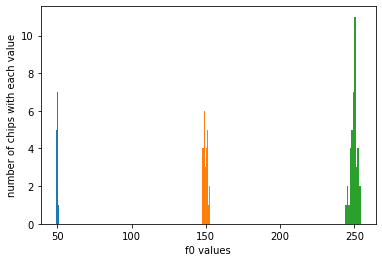

In [62]:
#james' code

import numpy as np
import matplotlib.pyplot as plt

# generate random values centered on 50, 150 and 250 (Hz)
nn = 40 # how many random values to generate at each center frequency
f50  = np.random.normal(loc=50, scale=0.5, size=nn)
f150 = np.random.normal(loc=150, scale=1.0, size=nn)
f250 = np.random.normal(loc=250, scale=2.0, size=nn)

# make a single array containing all f0 values
# this is what you would get from your test
f0 = np.concatenate((f50, f150, f250))

# a way to pull out a specific set of f0 values from the full list
id50  = np.where( f0 < 100)[0]
id150 = np.where((f0 > 100) & (f0<200) )[0]
id250 = np.where(f0 > 200)[0]

print (f0[id50])
# plot a separate historgram for 50, 150 and 250Hz data
a=plt.hist(f0[id50], bins=10)
b=plt.hist(f0[id150], bins=10)
c=plt.hist(f0[id250], bins=10)
plt.xlabel('f0 values')
plt.ylabel("number of chips with each value")
plt.savefig('histtest.pdf')
print(a)
print(b)
print(c)

[50.13, 50.13, 50.1, 50.06, 50.11, 50.11, 50.08, 50.07, 50.13, 50.12, 50.12, 50.11, 50.1, 50.11, 50.12, 50.13, 50.12, 50.1, 50.12, 50.1, 50.07, 50.1, 50.14, 50.09, 50.08, 50.1, 50.12, 50.12, 50.09, 50.12, 50.11, 50.1, 50.11, 50.11, 50.1, 50.14, 50.11, 50.11, 50.13, 50.06]
[50.13 50.13 50.1  50.06 50.11 50.11 50.08 50.07 50.13 50.12 50.12 50.11
 50.1  50.11 50.12 50.13 50.12 50.1  50.12 50.1  50.07 50.1  50.14 50.09
 50.08 50.1  50.12 50.12 50.09 50.12 50.11 50.1  50.11 50.11 50.1  50.14
 50.11 50.11 50.13 50.06]
(array([ 5.,  0.,  0.,  0.,  1., 22.,  0.,  0.,  0., 12.]), array([5.08 , 5.082, 5.084, 5.086, 5.088, 5.09 , 5.092, 5.094, 5.096,
       5.098, 5.1  ]), <BarContainer object of 10 artists>)
(array([ 2.,  3.,  6.,  1., 11.,  7.,  0.,  8.,  1.,  1.]), array([15.25 , 15.257, 15.264, 15.271, 15.278, 15.285, 15.292, 15.299,
       15.306, 15.313, 15.32 ]), <BarContainer object of 10 artists>)
(array([ 2.,  3.,  0.,  4.,  5., 13.,  4.,  7.,  0.,  2.]), array([25.41 , 25.422, 25.434, 

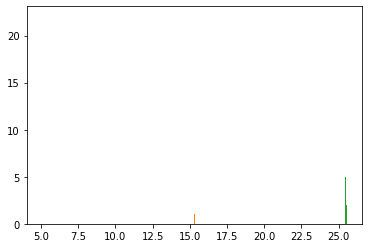

In [72]:
#histogram code

import csv, glob, matplotlib.pyplot as plt, os.path, numpy as np;
from csv import reader

homedir = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1OcwVYdCFsNitauuq7YD82J3wd781RFEz/Zhao_Nicole /jupyter_homedir/BPF_results/test/'
os.chdir(homedir)

#make a list of all folders
dirs = [d for d in os.listdir(homedir) if os.path.isdir(os.path.join(homedir, d))]

#create lists to store histogram x&y values pulled from files
f0_50 = []
f0_150 = []
f0_250 = []

bw_50 = []
bw_150 = []
bw_250 = []

q_50 = []
q_150 = []
q_250 = []

#iterate through data files to populate the lists
for d in dirs: 
    file_list = glob.glob(homedir + '/' + d + '/data*.csv')
    file_list.sort()
    #print(file_list)
    
    for file in file_list:
        data = pd.read_csv(file)
        if data.size != 0:
            f0_50.append(data["f0Meas_Hz"][0])
            f0_150.append(data["f0Meas_Hz"][1])
            f0_250.append(data["f0Meas_Hz"][2])

            bw_50.append(data["BW_3dB"][0])
            bw_150.append(data["BW_3dB"][1])
            bw_250.append(data["BW_3dB"][2])

            q_50.append(data["Ratio"][0])
            q_150.append(data["Ratio"][0])
            q_250.append(data["Ratio"][0])    

#concatenate 
q_total = np.concatenate((q50, q150, q250))

#convert the list to arrays
#arr_50 = np.array(f0_50)
#arr_150 = np.array(f0_150)
#arr_250=np.array(f0_250)

print(f0_50)




In [44]:
import csv, glob, matplotlib.pyplot as plt, os.path, numpy as np;
from csv import reader

homedir = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1OcwVYdCFsNitauuq7YD82J3wd781RFEz/Zhao_Nicole /jupyter_homedir/BPF_results/test/'
os.chdir(homedir)

#make a list of all folders
dirs = [d for d in os.listdir(homedir) if os.path.isdir(os.path.join(homedir, d))]

#create lists to store histogram x&y values pulled from files
f0_50 = []
f0_150 = []
f0_250 = []

bw_50 = []
bw_150 = []
bw_250 = []

q_50 = []
q_150 = []
q_250 = []

#iterate through data files to populate the lists
for d in dirs: 
    file_list = glob.glob(homedir + '/' + d + '/data*.csv')
    file_list.sort()
    #print(file_list)
    
    for file in file_list:
        data = pd.read_csv(file)
        if data.size != 0:
            f0_50.append(data["f0Meas_Hz"][0])
            f0_150.append(data["f0Meas_Hz"][1])
            f0_250.append(data["f0Meas_Hz"][2])

            bw_50.append(data["BW_3dB"][0])
            bw_150.append(data["BW_3dB"][1])
            bw_250.append(data["BW_3dB"][2])

            q_50.append(data["Ratio"][0])
            q_150.append(data["Ratio"][1])
            q_250.append(data["Ratio"][2])    

#concatenate list to make one q value list
q_total = q_50+ q_150+ q_250
print(q_total)

#turn into array
arr_q= np.array(q_total)
print(arr_q)

[9.8504139, 9.84, 9.83, 9.82, 9.83, 9.85, 9.84, 9.86, 9.85, 9.84, 9.85, 9.84, 9.85, 9.82, 9.84, 9.84, 9.83, 9.83, 9.85, 9.84, 9.84, 9.84, 9.85, 9.85, 9.86, 9.84, 9.83, 9.83, 9.84, 9.84, 9.84, 9.86, 9.83, 9.84, 9.85, 9.84, 9.85, 9.84, 9.82, 9.84, 9.8433834, 9.83, 9.83, 9.82, 9.83, 9.84, 9.83, 9.85, 9.84, 9.84, 9.84, 9.84, 9.85, 9.82, 9.84, 9.83, 9.83, 9.83, 9.85, 9.83, 9.84, 9.83, 9.84, 9.85, 9.85, 9.83, 9.83, 9.83, 9.83, 9.84, 9.84, 9.85, 9.83, 9.84, 9.84, 9.83, 9.84, 9.83, 9.82, 9.83, 9.8443397, 9.83, 9.82, 9.82, 9.83, 9.84, 9.83, 9.85, 9.84, 9.84, 9.84, 9.84, 9.85, 9.82, 9.84, 9.83, 9.83, 9.83, 9.85, 9.83, 9.84, 9.83, 9.84, 9.85, 9.85, 9.83, 9.83, 9.83, 9.83, 9.84, 9.84, 9.85, 9.83, 9.84, 9.84, 9.83, 9.84, 9.83, 9.82, 9.83]
[9.8504139 9.84      9.83      9.82      9.83      9.85      9.84
 9.86      9.85      9.84      9.85      9.84      9.85      9.82
 9.84      9.84      9.83      9.83      9.85      9.84      9.84
 9.84      9.85      9.85      9.86      9.84      9.83      9.83


In [24]:
#iterating over 3 plot types & data sets

plot_types = ['f0','bw','q']
plot_names = ['Center frequency [Hz]','Bandwidth below 3dB [Hz]','Ratio [dB]']
x = range(len(plot_types))

for i in x:
    arr_50 = np.array(str(plot_types[i]+'_50'))
    arr_150 = np.array(str(plot_types[i]+'_150'))
    arr_250= np.array(str(plot_types[i]+'_250'))


[9.8504139, 9.84, 9.83, 9.82, 9.83, 9.85, 9.84, 9.86, 9.85, 9.84, 9.85, 9.84, 9.85, 9.82, 9.84, 9.84, 9.83, 9.83, 9.85, 9.84, 9.84, 9.84, 9.85, 9.85, 9.86, 9.84, 9.83, 9.83, 9.84, 9.84, 9.84, 9.86, 9.83, 9.84, 9.85, 9.84, 9.85, 9.84, 9.82, 9.84]


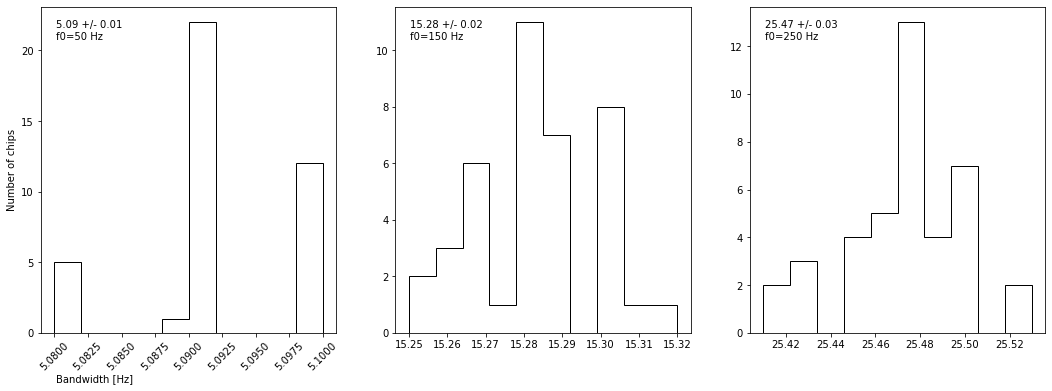

In [80]:
arr_50 = np.array(bw_50)
arr_150 = np.array(bw_150)
arr_250= np.array(bw_250)

# Compute mean and stdev of measured f0 values at each frequency
mean050, sig050 = np.mean(arr_50),  np.std(arr_50)
mean150, sig150 = np.mean(arr_150), np.std(arr_150)
mean250, sig250 = np.mean(arr_250), np.std(arr_250)

# Set up to make 3 histograms
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
nbins=10 # per histogram

# plot hists
axs[0].hist(arr_50, bins=nbins, histtype='step', color='k')
axs[0].xaxis.set_tick_params(rotation=45)
axs[1].hist(arr_150, bins=nbins, histtype='step', color='k')
axs[2].hist(arr_250, bins=nbins, histtype='step', color='k')

# Annotate
axs[0].set_ylabel("Number of chips")
#axs[0].set_xlabel('f0=50 Hz')
#axs[1].set_xlabel('f0=150 Hz')
#axs[2].set_xlabel('f0=250 Hz')
axs[0].text(0.05, -0.15
        , f'Bandwidth [Hz] ', 
            transform=axs[0].transAxes)
axs[0].text(0.05, 0.9, f'{mean050:0.2f} +/- {sig050:0.2f}'     
         '\nf0=50 Hz', 
            transform=axs[0].transAxes)
axs[1].text(0.05, 0.9, f'{mean150:0.2f} +/- {sig150:0.2f}'
            '\nf0=150 Hz', 
            transform=axs[1].transAxes)
axs[2].text(0.05, 0.9, f'{mean250:0.2f} +/- {sig250:0.2f}'
            '\nf0=250 Hz', 
            transform=axs[2].transAxes)

plt.savefig('Bandwidth [Hz].jpg')
    

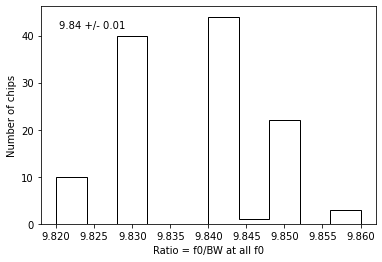

In [68]:
#plotting one histogram for all q values

meanq, sigq = np.mean(arr_q), np.std(arr_q)
nbins=10 # per histogram

#plot histogram
plt.hist(arr_q, bins=nbins, histtype='step', color='k')

#format
plt.ylabel("Number of chips")
plt.xlabel('Ratio = f0/BW at all f0')
#axs[0].text(0.05, -0.14, f'Ratio', transform=axs[0].transAxes)
plt.text(-0.35, 0.55, f'{mean050:0.2f} +/- {sig050:0.2f}', 
            transform=axs[0].transAxes)
plt.savefig('Ratio_all.jpg')